In [1]:
import tensorflow as tf
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import keras

In [2]:
os.chdir(r'C:\Users\User\Desktop\Toby\Farm boundary detection\Crop boundary detection\farm edge boundary detection\Train\Labelme_output_data\new dataset')

In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is E8AA-B094

 Directory of C:\Users\User\Desktop\Toby\Farm boundary detection\Crop boundary detection\farm edge boundary detection\Train\Labelme_output_data\new dataset

10/13/2021  10:27 AM    <DIR>          .
10/13/2021  10:27 AM    <DIR>          ..
10/08/2021  03:06 PM        23,524,304 best_model.hdf5
10/08/2021  02:08 PM    <DIR>          Binary Mask
10/13/2021  10:05 AM           226,716 Final Output.png
10/08/2021  02:08 PM    <DIR>          RGB
               2 File(s)     23,751,020 bytes
               4 Dir(s)  296,004,898,816 bytes free


In [23]:
train_path = 'RGB/'
test_path = 'Binary Mask/'

img_height =512 
img_width = 512
img_channels = 3

train_ids = sorted(next(os.walk(train_path)) [2])
print(train_ids[0])
test_ids = sorted(next(os.walk(test_path)) [2])
print(test_ids[0])

area_1_0000_f0_a0.png
area_1_0000_f0_a0.png


In [24]:
sorted(test_ids)
#test_ids= test_ids[:-1]

['area_1_0000_f0_a0.png',
 'area_1_0000_f0_a180.png',
 'area_1_0000_f0_a270.png',
 'area_1_0000_f0_a90.png',
 'area_1_0000_f1_a0.png',
 'area_1_0000_f1_a180.png',
 'area_1_0000_f1_a270.png',
 'area_1_0000_f1_a90.png',
 'area_1_0000_f2_a0.png',
 'area_1_0000_f2_a180.png',
 'area_1_0000_f2_a270.png',
 'area_1_0000_f2_a90.png',
 'area_1_0000_f3_a0.png',
 'area_1_0000_f3_a180.png',
 'area_1_0000_f3_a270.png',
 'area_1_0000_f3_a90.png',
 'area_1_0001_f0_a0.png',
 'area_1_0001_f0_a180.png',
 'area_1_0001_f0_a270.png',
 'area_1_0001_f0_a90.png',
 'area_1_0001_f1_a0.png',
 'area_1_0001_f1_a180.png',
 'area_1_0001_f1_a270.png',
 'area_1_0001_f1_a90.png',
 'area_1_0001_f2_a0.png',
 'area_1_0001_f2_a180.png',
 'area_1_0001_f2_a270.png',
 'area_1_0001_f2_a90.png',
 'area_1_0001_f3_a0.png',
 'area_1_0001_f3_a180.png',
 'area_1_0001_f3_a270.png',
 'area_1_0001_f3_a90.png',
 'area_1_0002_f0_a0.png',
 'area_1_0002_f0_a180.png',
 'area_1_0002_f0_a270.png',
 'area_1_0002_f0_a90.png',
 'area_1_0002_f1_a0

In [25]:
sorted(train_ids)

['area_1_0000_f0_a0.png',
 'area_1_0000_f0_a180.png',
 'area_1_0000_f0_a270.png',
 'area_1_0000_f0_a90.png',
 'area_1_0000_f1_a0.png',
 'area_1_0000_f1_a180.png',
 'area_1_0000_f1_a270.png',
 'area_1_0000_f1_a90.png',
 'area_1_0000_f2_a0.png',
 'area_1_0000_f2_a180.png',
 'area_1_0000_f2_a270.png',
 'area_1_0000_f2_a90.png',
 'area_1_0000_f3_a0.png',
 'area_1_0000_f3_a180.png',
 'area_1_0000_f3_a270.png',
 'area_1_0000_f3_a90.png',
 'area_1_0001_f0_a0.png',
 'area_1_0001_f0_a180.png',
 'area_1_0001_f0_a270.png',
 'area_1_0001_f0_a90.png',
 'area_1_0001_f1_a0.png',
 'area_1_0001_f1_a180.png',
 'area_1_0001_f1_a270.png',
 'area_1_0001_f1_a90.png',
 'area_1_0001_f2_a0.png',
 'area_1_0001_f2_a180.png',
 'area_1_0001_f2_a270.png',
 'area_1_0001_f2_a90.png',
 'area_1_0001_f3_a0.png',
 'area_1_0001_f3_a180.png',
 'area_1_0001_f3_a270.png',
 'area_1_0001_f3_a90.png',
 'area_1_0002_f0_a0.png',
 'area_1_0002_f0_a180.png',
 'area_1_0002_f0_a270.png',
 'area_1_0002_f0_a90.png',
 'area_1_0002_f1_a0

In [26]:
print(len(train_ids))
print(len(test_ids))


560
560


In [27]:
X_train = np.zeros((len(train_ids),img_height, img_width, img_channels ), dtype=np.uint8)
Y_train = np.zeros((len(test_ids),img_height,img_width),dtype=np.bool)

In [28]:
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = train_path + id_
    print(path)
    img = Image.open(path)
    X_train[n]=img
  

  0%|          | 0/560 [00:00<?, ?it/s]

RGB/area_1_0000_f0_a0.png
RGB/area_1_0000_f0_a180.png
RGB/area_1_0000_f0_a270.png
RGB/area_1_0000_f0_a90.png
RGB/area_1_0000_f1_a0.png
RGB/area_1_0000_f1_a180.png
RGB/area_1_0000_f1_a270.png
RGB/area_1_0000_f1_a90.png
RGB/area_1_0000_f2_a0.png
RGB/area_1_0000_f2_a180.png
RGB/area_1_0000_f2_a270.png
RGB/area_1_0000_f2_a90.png
RGB/area_1_0000_f3_a0.png
RGB/area_1_0000_f3_a180.png
RGB/area_1_0000_f3_a270.png
RGB/area_1_0000_f3_a90.png
RGB/area_1_0001_f0_a0.png
RGB/area_1_0001_f0_a180.png
RGB/area_1_0001_f0_a270.png
RGB/area_1_0001_f0_a90.png
RGB/area_1_0001_f1_a0.png
RGB/area_1_0001_f1_a180.png
RGB/area_1_0001_f1_a270.png
RGB/area_1_0001_f1_a90.png
RGB/area_1_0001_f2_a0.png
RGB/area_1_0001_f2_a180.png
RGB/area_1_0001_f2_a270.png
RGB/area_1_0001_f2_a90.png
RGB/area_1_0001_f3_a0.png
RGB/area_1_0001_f3_a180.png
RGB/area_1_0001_f3_a270.png
RGB/area_1_0001_f3_a90.png
RGB/area_1_0002_f0_a0.png
RGB/area_1_0002_f0_a180.png
RGB/area_1_0002_f0_a270.png
RGB/area_1_0002_f0_a90.png
RGB/area_1_0002_f1_

RGB/area_1_0019_f2_a90.png
RGB/area_1_0019_f3_a0.png
RGB/area_1_0019_f3_a180.png
RGB/area_1_0019_f3_a270.png
RGB/area_1_0019_f3_a90.png
RGB/area_1_0020_f0_a0.png
RGB/area_1_0020_f0_a180.png
RGB/area_1_0020_f0_a270.png
RGB/area_1_0020_f0_a90.png
RGB/area_1_0020_f1_a0.png
RGB/area_1_0020_f1_a180.png
RGB/area_1_0020_f1_a270.png
RGB/area_1_0020_f1_a90.png
RGB/area_1_0020_f2_a0.png
RGB/area_1_0020_f2_a180.png
RGB/area_1_0020_f2_a270.png
RGB/area_1_0020_f2_a90.png
RGB/area_1_0020_f3_a0.png
RGB/area_1_0020_f3_a180.png
RGB/area_1_0020_f3_a270.png
RGB/area_1_0020_f3_a90.png
RGB/area_1_0021_f0_a0.png
RGB/area_1_0021_f0_a180.png
RGB/area_1_0021_f0_a270.png
RGB/area_1_0021_f0_a90.png
RGB/area_1_0021_f1_a0.png
RGB/area_1_0021_f1_a180.png
RGB/area_1_0021_f1_a270.png
RGB/area_1_0021_f1_a90.png
RGB/area_1_0021_f2_a0.png
RGB/area_1_0021_f2_a180.png
RGB/area_1_0021_f2_a270.png
RGB/area_1_0021_f2_a90.png
RGB/area_1_0021_f3_a0.png
RGB/area_1_0021_f3_a180.png
RGB/area_1_0021_f3_a270.png
RGB/area_1_0021_f3_

In [29]:
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path_test = test_path + id_
    print(path_test)
    mask = Image.open(path_test)
    Y_train[n]=mask

  0%|          | 0/560 [00:00<?, ?it/s]

Binary Mask/area_1_0000_f0_a0.png
Binary Mask/area_1_0000_f0_a180.png
Binary Mask/area_1_0000_f0_a270.png
Binary Mask/area_1_0000_f0_a90.png
Binary Mask/area_1_0000_f1_a0.png
Binary Mask/area_1_0000_f1_a180.png
Binary Mask/area_1_0000_f1_a270.png
Binary Mask/area_1_0000_f1_a90.png
Binary Mask/area_1_0000_f2_a0.png
Binary Mask/area_1_0000_f2_a180.png
Binary Mask/area_1_0000_f2_a270.png
Binary Mask/area_1_0000_f2_a90.png
Binary Mask/area_1_0000_f3_a0.png
Binary Mask/area_1_0000_f3_a180.png
Binary Mask/area_1_0000_f3_a270.png
Binary Mask/area_1_0000_f3_a90.png
Binary Mask/area_1_0001_f0_a0.png
Binary Mask/area_1_0001_f0_a180.png
Binary Mask/area_1_0001_f0_a270.png
Binary Mask/area_1_0001_f0_a90.png
Binary Mask/area_1_0001_f1_a0.png
Binary Mask/area_1_0001_f1_a180.png
Binary Mask/area_1_0001_f1_a270.png
Binary Mask/area_1_0001_f1_a90.png
Binary Mask/area_1_0001_f2_a0.png
Binary Mask/area_1_0001_f2_a180.png
Binary Mask/area_1_0001_f2_a270.png
Binary Mask/area_1_0001_f2_a90.png
Binary Mask/a

Binary Mask/area_1_0016_f3_a180.png
Binary Mask/area_1_0016_f3_a270.png
Binary Mask/area_1_0016_f3_a90.png
Binary Mask/area_1_0017_f0_a0.png
Binary Mask/area_1_0017_f0_a180.png
Binary Mask/area_1_0017_f0_a270.png
Binary Mask/area_1_0017_f0_a90.png
Binary Mask/area_1_0017_f1_a0.png
Binary Mask/area_1_0017_f1_a180.png
Binary Mask/area_1_0017_f1_a270.png
Binary Mask/area_1_0017_f1_a90.png
Binary Mask/area_1_0017_f2_a0.png
Binary Mask/area_1_0017_f2_a180.png
Binary Mask/area_1_0017_f2_a270.png
Binary Mask/area_1_0017_f2_a90.png
Binary Mask/area_1_0017_f3_a0.png
Binary Mask/area_1_0017_f3_a180.png
Binary Mask/area_1_0017_f3_a270.png
Binary Mask/area_1_0017_f3_a90.png
Binary Mask/area_1_0018_f0_a0.png
Binary Mask/area_1_0018_f0_a180.png
Binary Mask/area_1_0018_f0_a270.png
Binary Mask/area_1_0018_f0_a90.png
Binary Mask/area_1_0018_f1_a0.png
Binary Mask/area_1_0018_f1_a180.png
Binary Mask/area_1_0018_f1_a270.png
Binary Mask/area_1_0018_f1_a90.png
Binary Mask/area_1_0018_f2_a0.png
Binary Mask/a

Binary Mask/area_1_0032_f1_a0.png
Binary Mask/area_1_0032_f1_a180.png
Binary Mask/area_1_0032_f1_a270.png
Binary Mask/area_1_0032_f1_a90.png
Binary Mask/area_1_0032_f2_a0.png
Binary Mask/area_1_0032_f2_a180.png
Binary Mask/area_1_0032_f2_a270.png
Binary Mask/area_1_0032_f2_a90.png
Binary Mask/area_1_0032_f3_a0.png
Binary Mask/area_1_0032_f3_a180.png
Binary Mask/area_1_0032_f3_a270.png
Binary Mask/area_1_0032_f3_a90.png
Binary Mask/area_1_0033_f0_a0.png
Binary Mask/area_1_0033_f0_a180.png
Binary Mask/area_1_0033_f0_a270.png
Binary Mask/area_1_0033_f0_a90.png
Binary Mask/area_1_0033_f1_a0.png
Binary Mask/area_1_0033_f1_a180.png
Binary Mask/area_1_0033_f1_a270.png
Binary Mask/area_1_0033_f1_a90.png
Binary Mask/area_1_0033_f2_a0.png
Binary Mask/area_1_0033_f2_a180.png
Binary Mask/area_1_0033_f2_a270.png
Binary Mask/area_1_0033_f2_a90.png
Binary Mask/area_1_0033_f3_a0.png
Binary Mask/area_1_0033_f3_a180.png
Binary Mask/area_1_0033_f3_a270.png
Binary Mask/area_1_0033_f3_a90.png
Binary Mask/a

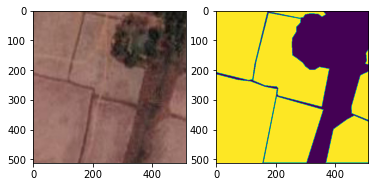

In [30]:
def plotting (x ,y):
  n = np.random.randint(0,100)
  plt.subplot(121)
  plt.imshow(x[n])
  plt.subplot(122)
  plt.imshow(y[n])

plotting(X_train,Y_train)

(512, 512, 3)
(512, 512)


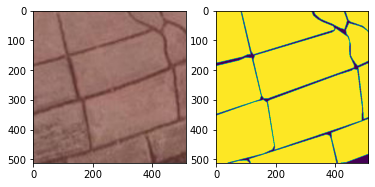

In [31]:
#X_train_new = X_train/255
#Y_train_new = Y_train/255
#plotting(X_train_new,Y_t  rain_new)

#img_size = 512
#num_classes =2 

plotting(X_train,Y_train)

print(X_train[n].shape)
print(Y_train[n].shape)

In [6]:
    def dice_coef(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)  # -------------------------------------------------- explicit cast
        y_true = K.flatten(y_true)
        y_pred = K.flatten(y_pred)
        intersection = K.sum(y_true * y_pred)
        return 2.0 * intersection / (K.sum(y_true) + K.sum(y_pred) + 1.)

    ## function for measuring loss value
    def dice_coef_loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)  # -------------------------------------------------- explicit cast
        return 1.0 - dice_coef(y_true, y_pred)

    ## Merge loss
    def bce_dice_loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)  # -------------------------------------------------- explicit cast
        a = 0.5
        b = 1-a
        loss = a * K.binary_crossentropy(y_true, y_pred) + b * dice_coef_loss(y_true, y_pred)
        return loss

In [14]:
#Build the model
IMG_HEIGHT = 512
IMG_WIDTH = 512
IMG_CHANNELS = 3
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
#model.summary()

In [10]:
import keras.backend as K
#import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Conv2D,Flatten,BatchNormalization,MaxPooling2D,Input,Lambda,Dropout,Concatenate,concatenate,Conv2DTranspose

In [16]:
history = model.fit(X_train,Y_train,epochs=20,verbose = 1, batch_size=4,validation_split=0.2)

Epoch 1/20
112/112 [==============================] - 297s 3s/step - loss: 0.2794 - precision: 0.7967 - recall: 0.9769 - val_loss: 0.1441 - val_precision: 0.9353 - val_recall: 0.8958
Epoch 2/20
112/112 [==============================] - 295s 3s/step - loss: 0.1553 - precision: 0.9237 - recall: 0.9613 - val_loss: 0.1015 - val_precision: 0.9120 - val_recall: 0.9694
Epoch 3/20
112/112 [==============================] - 297s 3s/step - loss: 0.1407 - precision: 0.9281 - recall: 0.9632 - val_loss: 0.1033 - val_precision: 0.9124 - val_recall: 0.9715
Epoch 4/20
112/112 [==============================] - 296s 3s/step - loss: 0.1340 - precision: 0.9354 - recall: 0.9584 - val_loss: 0.0977 - val_precision: 0.8932 - val_recall: 0.9956
Epoch 5/20
112/112 [==============================] - 295s 3s/step - loss: 0.1263 - precision: 0.9392 - recall: 0.9621 - val_loss: 0.0915 - val_precision: 0.9108 - val_recall: 0.9873
Epoch 6/20
112/112 [==============================] - 295s 3s/step - loss: 0.1141 - p

In [ ]:
def DeepUNet(num_classes=1,
             image_size=512,
             img_channels=3,
             activation_fn = 'sigmoid',
             n_filters_start=32,
             growth_factor=2,
             upconv=True
            ):
    """
    Reference - https://github.com/reachsumit/deep-unet-for-satellite-image-segmentation/blob/master/unet_model_deeper.py
    """
    
    droprate=0.25
    n_filters = n_filters_start
    inputs = Input((image_size, image_size, img_channels))
    
    s = Lambda(lambda x: x / 255)(inputs)
    
    conv1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(s)
    conv1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    pool1 = Dropout(droprate)(pool1)

    n_filters *= growth_factor
    pool1 = BatchNormalization()(pool1)
    conv2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    pool2 = Dropout(droprate)(pool2)

    n_filters *= growth_factor
    pool2 = BatchNormalization()(pool2)
    conv3 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    pool3 = Dropout(droprate)(pool3)

    n_filters *= growth_factor
    pool3 = BatchNormalization()(pool3)
    conv4_0 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool3)
    conv4_0 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv4_0)
    pool4_0 = MaxPooling2D(pool_size=(2, 2))(conv4_0)
    pool4_0 = Dropout(droprate)(pool4_0)

    n_filters *= growth_factor
    pool4_0 = BatchNormalization()(pool4_0)
    conv4_1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool4_0)
    conv4_1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv4_1)
    pool4_1 = MaxPooling2D(pool_size=(2, 2))(conv4_1)
    pool4_1 = Dropout(droprate)(pool4_1)

    n_filters *= growth_factor
    pool4_1 = BatchNormalization()(pool4_1)
    conv4_2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool4_1)
    conv4_2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv4_2)
    pool4_2 = MaxPooling2D(pool_size=(2, 2))(conv4_2)
    pool4_2 = Dropout(droprate)(pool4_2)

    n_filters *= growth_factor
    pool4_2 = BatchNormalization()(pool4_2)
    conv5 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(pool4_2)
    conv5 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = Dropout(droprate)(conv5)

    n_filters //= growth_factor
    if upconv:
        up6 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv5), conv4_2])
    else:
        up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4_2])
    up6 = BatchNormalization()(up6)
    conv6 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = Dropout(droprate)(conv6)

    n_filters //= growth_factor
    if upconv:
        up6_1 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv6), conv4_1])
    else:
        up6_1 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv4_1])
    up6_1 = BatchNormalization()(up6_1)
    conv6_1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up6_1)
    conv6_1 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv6_1)
    conv6_1 = Dropout(droprate)(conv6_1)

    n_filters //= growth_factor
    if upconv:
        up6_2 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv6_1), conv4_0])
    else:
        up6_2 = concatenate([UpSampling2D(size=(2, 2))(conv6_1), conv4_0])
    up6_2 = BatchNormalization()(up6_2)
    conv6_2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up6_2)
    conv6_2 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv6_2)
    conv6_2 = Dropout(droprate)(conv6_2)

    n_filters //= growth_factor
    if upconv:
        up7 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv6_2), conv3])
    else:
        up7 = concatenate([UpSampling2D(size=(2, 2))(conv6_2), conv3])
    up7 = BatchNormalization()(up7)
    conv7 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = Dropout(droprate)(conv7)

    n_filters //= growth_factor
    if upconv:
        up8 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv7), conv2])
    else:
        up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2])
    up8 = BatchNormalization()(up8)
    conv8 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = Dropout(droprate)(conv8)

    n_filters //= growth_factor
    if upconv:
        up9 = concatenate([Conv2DTranspose(n_filters, (2, 2), strides=(2, 2), padding='same')(conv8), conv1])
    else:
        up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1])
    up9 = BatchNormalization()(up9)
    conv9 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(n_filters, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(num_classes, (1, 1), activation=activation_fn)(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    
    return model

In [ ]:
def get_deepmodel():
    return DeepUNet(num_classes=1,image_size=512,img_channels=3,activation_fn='sigmoid',n_filters_start=32,growth_factor=2,upconv=True)

model = get_deepmodel()
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.summary()

In [11]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs['loss']<=0.01):
            print('\nLoss has reached below 0.01')
            self.model.stop_training= True
cb =myCallback()

from keras.callbacks import ModelCheckpoint

checkpoint=ModelCheckpoint("best_model.hdf5",monitor='loss',verbose=1,save_best_only=True,mode='auto')

In [ ]:
history = model.fit(X_train,Y_train,epochs=50,verbose = 1, batch_size=4,validation_split=0.2,callbacks=[cb,checkpoint])

In [ ]:
model.evaluate(X_train,Y_train)

dict_keys(['loss', 'precision', 'recall', 'val_loss', 'val_precision', 'val_recall'])


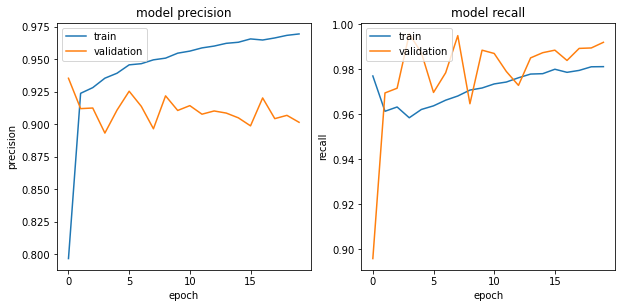

In [18]:
print(history.history.keys())
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(222)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')


(512, 512, 3)
(512, 512)
1/1 [==============================] - 0s 466ms/step


Text(0.5, 1.0, 'Testing RGB')

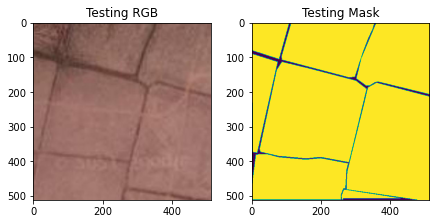

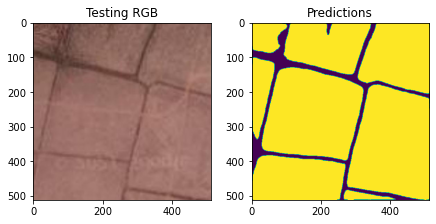

In [164]:
n = np.random.randint(0,100)
X_test = X_train[n]
Y_test = Y_train[n] 

plt.figure(figsize=(15,15))
plt.subplot(441)
plt.imshow(X_test)
plt.title('Testing RGB')

plt.subplot(442)
plt.imshow(Y_test)
plt.title('Testing Mask')
print(X_test.shape)
print(Y_test.shape)


testing = np.expand_dims(X_test,axis=0)
pred = model.predict(testing,verbose=1)
preds = np.argmax(pred,axis=-1)

plt.figure(figsize=(15,15))
plt.subplot(444)
plt.imshow(np.squeeze(pred>=0.95))
plt.title('Predictions')
plt.subplot(443)
plt.imshow(X_test)
plt.title('Testing RGB')



In [31]:
model.save('C:/Users/User/Desktop/Toby/Farm boundary detection/Toby_unet_boundary_edge_detection_epoch150.h5')

In [9]:
from tensorflow import keras
model = keras.models.load_model('C:/Users/User/Desktop/Toby/Farm boundary detection/Toby_unet_boundary_edge_detection_epoch150.h5',custom_objects={'bce_dice_loss':bce_dice_loss,'dice_coef':dice_coef})

NameError: name 'bce_dice_loss' is not defined

In [13]:
final_image = reconstruct(predictions,3441*0.5,2237*0.5,512,512,True)
plt.title('Final Predictions')
plt.imshow(final_image)
#plt.savefig('/content/final_predictions.png')

NameError: name 'reconstruct' is not defined

In [2]:

from tensorflow import keras

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import os
import image_utils as ps

import tifffile as tfl

In [209]:

image_dir = 'C:/Users/User/Desktop/Toby/Farm boundary detection/Crop boundary detection/farm edge boundary detection/Train/inference.jpg'
image = np.array(Image.open(image_dir))

In [3]:
data ='C:/Users/User/Desktop/test1.tif'
image =np.array(Image.open(data))

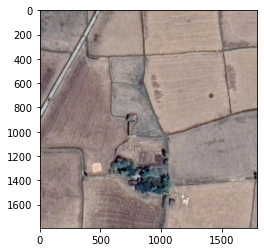

In [4]:
plt.imshow(image)

original height= 1792, original width = 1792
new height = 1792, new width = 1792


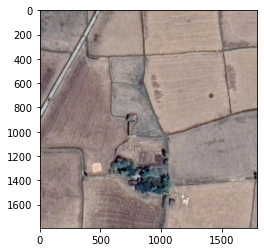

In [5]:

resize = True

scale = 1

if resize:
    image = ps.resize_image(image, percent = scale)
    
plt.imshow(image)

In [6]:
model_input_w = 512
model_input_h = 512

# pad & crop
padded_image = ps.pad(image, model_input_w, model_input_h)
cropped_tiles = ps.crop(padded_image, model_input_w, model_input_h, numpy_output=True)

image width =  1792 , image height =  1792
pad width =  256 , pad height =  256


In [7]:

model_predictions = model.predict(cropped_tiles,verbose=1)

preds = np.squeeze(model_predictions)

threshold = 0.97
preds = preds >= threshold

NameError: name 'model' is not defined

In [8]:
img_h, img_w = image.shape[:2]

predicted_image = ps.reconstruct(preds, img_w, img_h, model_input_w, model_input_h, numpy_output = False)
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.imshow(predicted_image)

plt.subplot(212)
plt.imshow(image)

NameError: name 'preds' is not defined

# Erosion and Dilusion for post processing

In [27]:
import cv2

In [28]:
# Taking a matrix of size 5 as the kernel
kernel = np.ones((3,3), np.int16)

In [29]:
from skimage.morphology import erosion, dilation
def multi_erosion(image, kernel, iterations):
    for i in range(iterations):
        image = erosion(image, kernel)
    return image
def multi_dilation(image, kernel, iterations):
    for i in range(iterations):
        image = dilation(image, kernel)
    return image

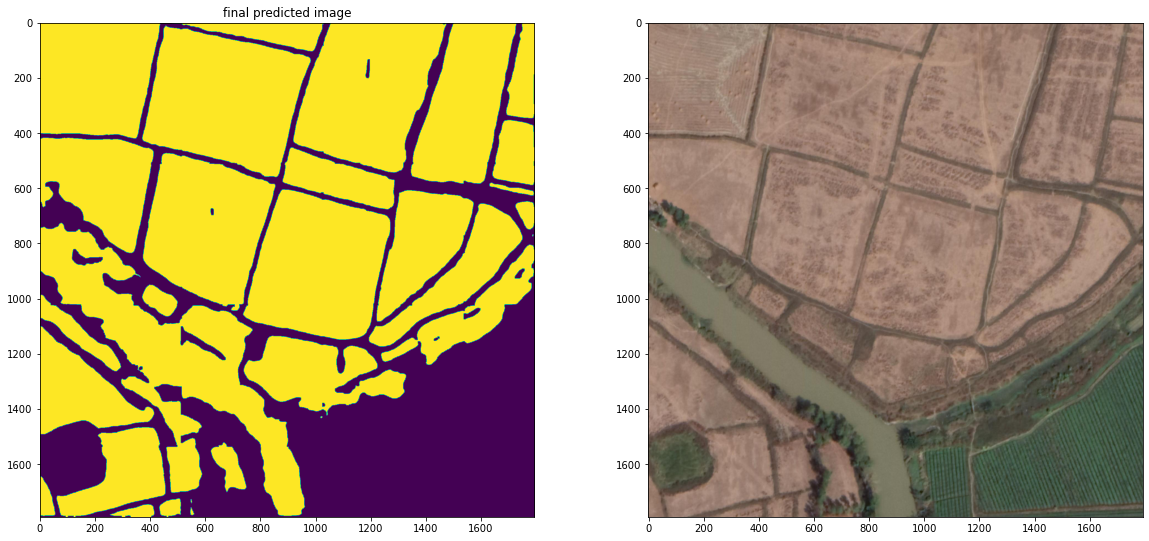

In [30]:
dil = multi_dilation(predicted_image,kernel,iterations=2)
final_output= multi_erosion(dil, kernel,iterations=3)

plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(final_output)
plt.title('final predicted image')
plt.subplot(222)
plt.imshow(image)

final_output = Image.fromarray(final_output)
#final_output.save('Final Output.png')